In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import random 
from sklearn import datasets, svm, cross_validation, tree , preprocessing, metrics
import sklearn.ensemble as ske

In [22]:
titanic = pd.read_csv('../../titanic3.csv')

In [23]:
tt = titanic[['pclass','survived', 'sex', 'age', 'fare','boat']]

In [24]:
tt

,pclass,survived,sex,age,fare,boat
0,1.0,1.0,female,29.0000,211.3375,2
1,1.0,1.0,male,0.9167,151.5500,11
2,1.0,0.0,female,2.0000,151.5500,NaN
3,1.0,0.0,male,30.0000,151.5500,NaN
4,1.0,0.0,female,25.0000,151.5500,NaN
5,1.0,1.0,male,48.0000,26.5500,3
6,1.0,1.0,female,63.0000,77.9583,10
7,1.0,0.0,male,39.0000,0.0000,NaN
8,1.0,1.0,female,53.0000,51.4792,D
9,1.0,0.0,male,71.0000,49.5042,NaN


In [25]:
tt['survived'].mean()

0.3819709702062643

In [26]:
tt['age'].mean()

29.8811345124283

In [27]:
tt.groupby('pclass').mean()

,survived,age,fare
pclass,,,
1.0,0.619195,39.159918,87.508992
2.0,0.429603,29.506705,21.179196
3.0,0.255289,24.816367,13.302889


In [28]:
tt.groupby('sex').mean()

,pclass,survived,age,fare
sex,,,,
female,2.154506,0.727468,28.687071,46.198097
male,2.372479,0.190985,30.585233,26.154601


In [29]:
class_sex_grouping = tt.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age        fare
pclass sex                                    
1.0    female  0.965278  37.037594  109.412385
       male    0.340782  41.029250   69.888385
2.0    female  0.886792  27.499191   23.234827
       male    0.146199  30.815401   19.904946
3.0    female  0.490741  22.185307   15.324250
       male    0.152130  25.962273   12.415462

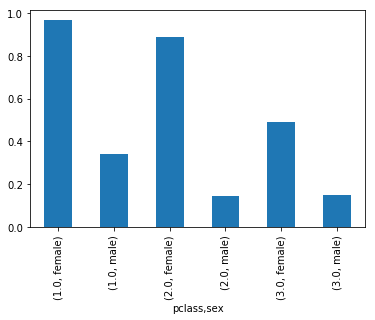

In [31]:
class_sex_grouping['survived'].plot.bar()

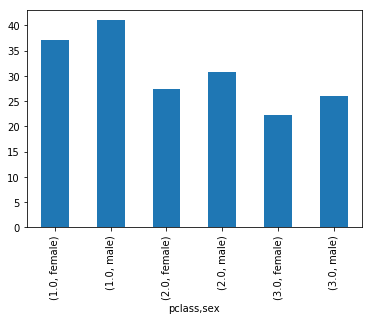

In [32]:
class_sex_grouping['age'].plot.bar()